In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn import preprocessing

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score

In [2]:
# Load dataset (we're only using VALIDATION set as our data)
original_df = pd.read_parquet('dataset/316_v4_validation.parquet')

In [3]:
original_df.head(5)

,era,data_type,feature_honoured_observational_balaamite,feature_polaroid_vadose_quinze,feature_untidy_withdrawn_bargeman,feature_genuine_kyphotic_trehala,feature_unenthralled_sportful_schoolhouse,feature_divulsive_explanatory_ideologue,feature_ichthyotic_roofed_yeshiva,feature_waggly_outlandish_carbonisation,...,target_paul_v4_20,target_paul_v4_60,target_george_v4_20,target_george_v4_60,target_william_v4_20,target_william_v4_60,target_arthur_v4_20,target_arthur_v4_60,target_thomas_v4_20,target_thomas_v4_60
id,,,,,,,,,,,,,,,,,,,,,
n000101811a8a843,0575,validation,0.50,0.0,1.0,0.00,0.75,0.00,1.00,0.25,...,0.50,0.50,0.50,0.50,0.666667,0.500000,0.500000,0.500000,0.666667,0.500000
n001e1318d5072ac,0575,validation,0.25,1.0,0.5,0.50,0.25,0.75,0.75,0.00,...,0.00,0.25,0.00,0.50,0.166667,0.333333,0.333333,0.166667,0.166667,0.333333
n002a9c5ab785cbb,0575,validation,0.25,0.5,0.5,0.75,0.25,0.25,0.75,0.00,...,0.50,0.75,0.50,0.75,0.500000,0.666667,0.500000,0.666667,0.500000,0.666667
n002ccf6d0e8c5ad,0575,validation,0.50,1.0,0.5,1.00,0.50,1.00,0.75,0.50,...,0.25,0.00,0.25,0.00,0.166667,0.166667,0.333333,0.500000,0.333333,0.166667
n0051ab821295c29,0575,validation,0.50,0.0,0.0,0.25,0.00,1.00,0.50,0.25,...,0.50,0.50,0.50,0.50,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000


In [4]:
era_list = original_df.era.unique()    # Getting unique era
features = [f for f in list(original_df) if 'feature' in f]    # Getting feature columns
targets = [t for t in list(original_df) if 'target' in t]      # Getting target columns

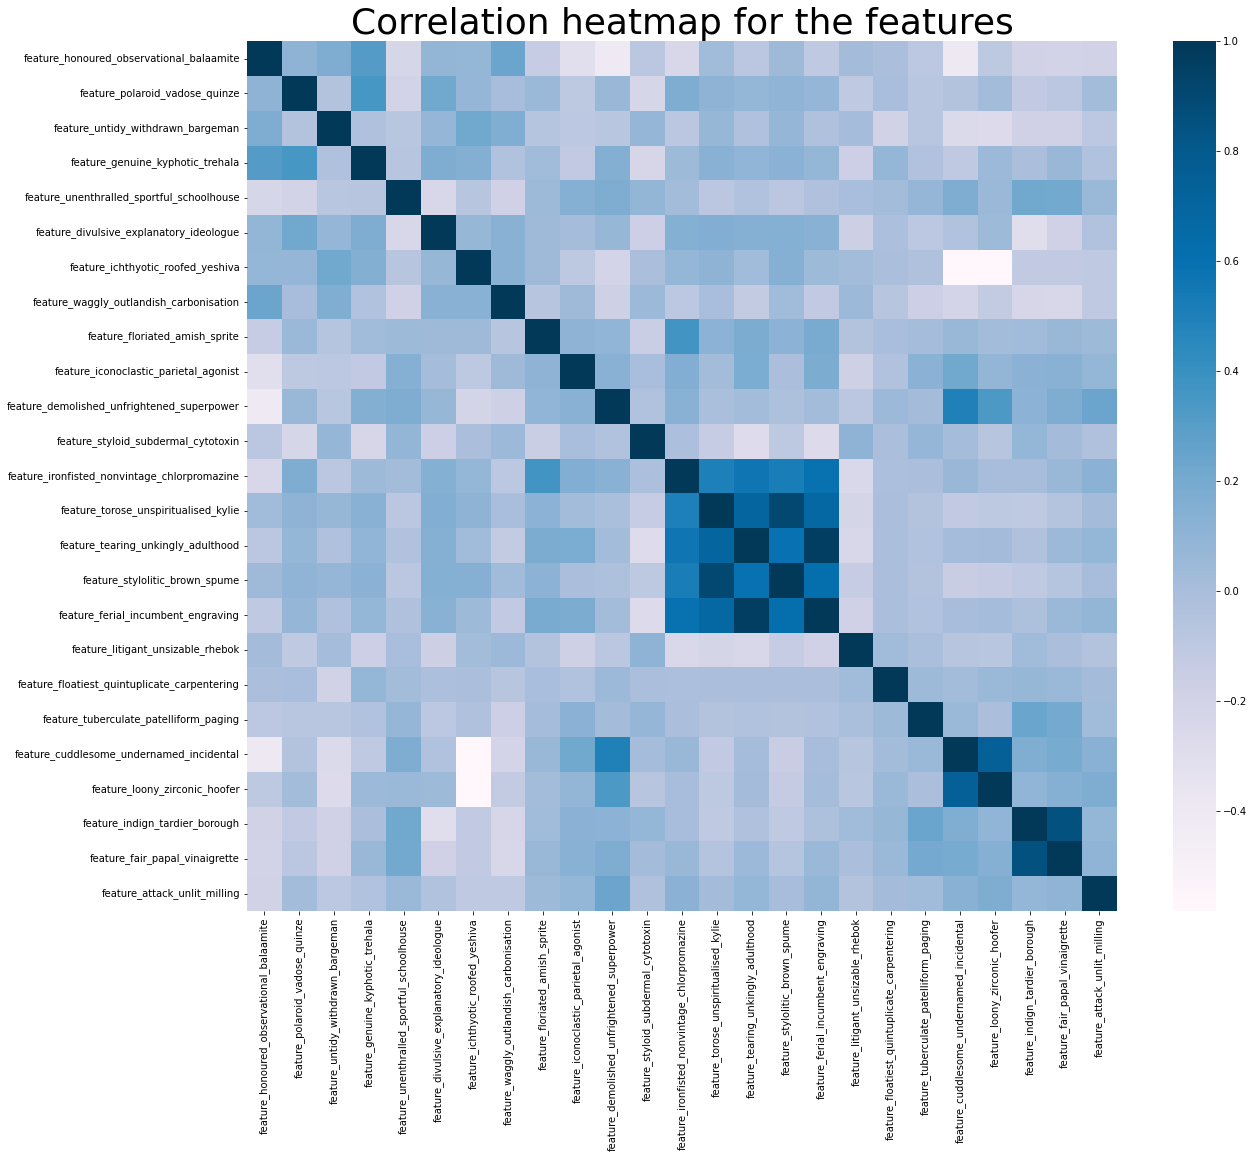

In [5]:
# Heatmap Feature Correlation (only looking at the first 25 features)
def heat_mat(df, features):
    corrmat = df[features[:25]].corr()

    f, ax = plt.subplots(figsize=(20, 16))

    sns.heatmap(corrmat, square = True, cmap = 'PuBu')
    plt.title('Correlation heatmap for the features', fontsize=36)

heat_mat(original_df, features)

plt.savefig('photo/heatmap_pic.png')

/var/folders/_0/541h7pgs06l9wr3xp3jssnsc0000gn/T/ipykernel_19211/1321258194.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


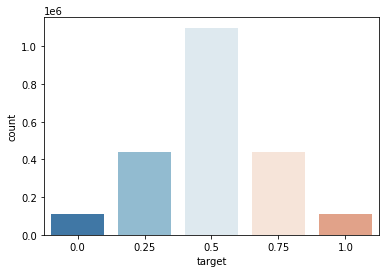

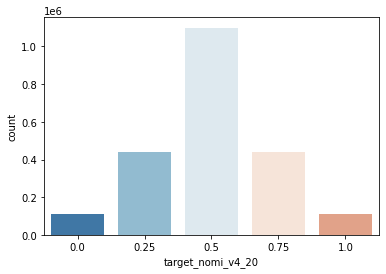

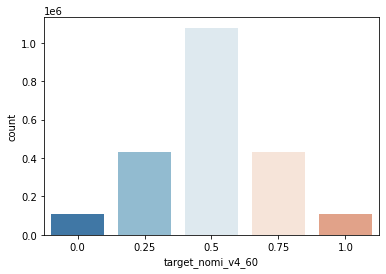

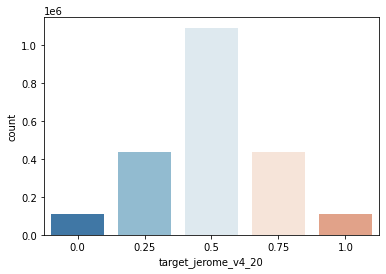

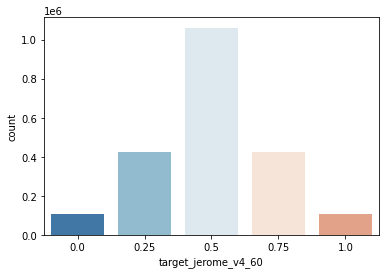

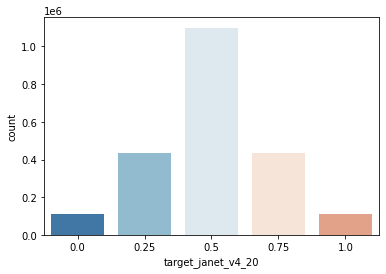

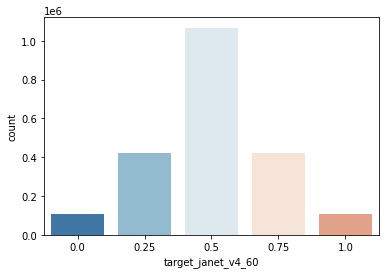

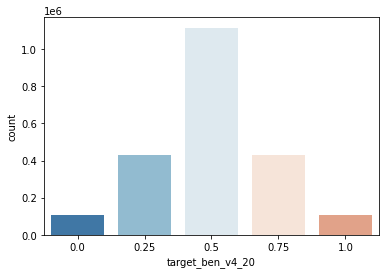

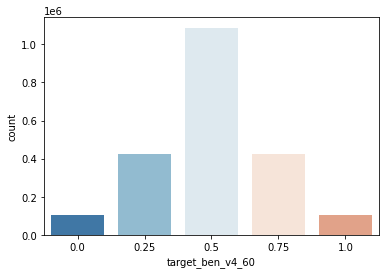

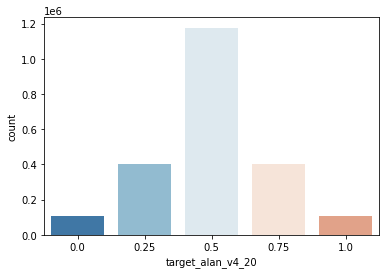

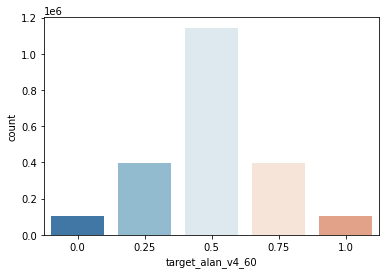

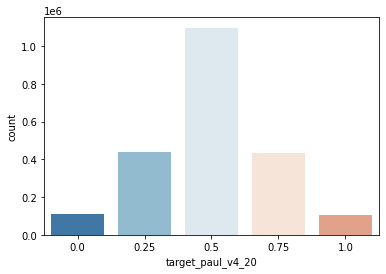

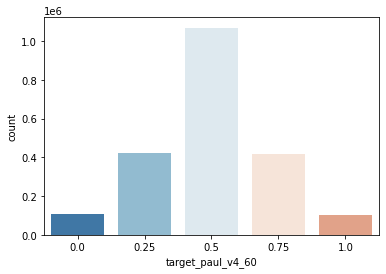

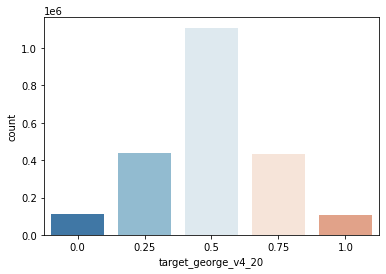

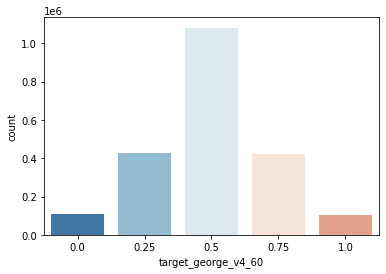

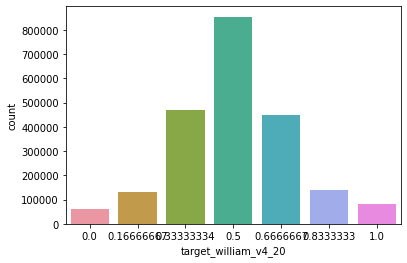

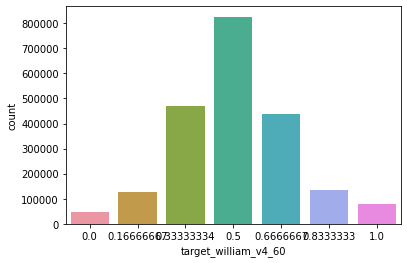

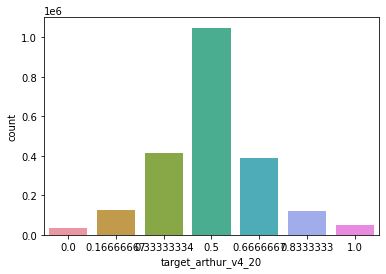

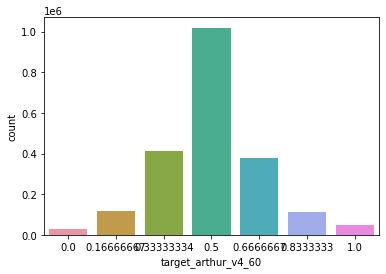

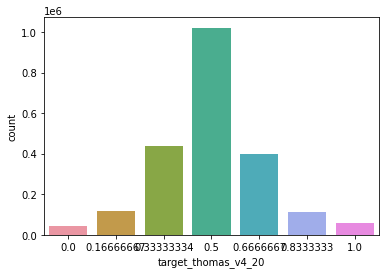

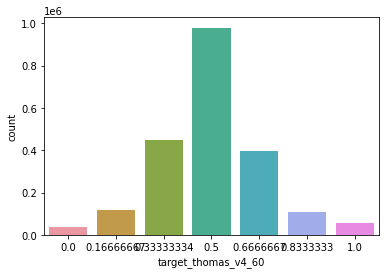

In [6]:
# Countplot Targets
sns.set_palette('RdBu_r')
def plot_target_correlation(df, targets):
    for i, col in enumerate(targets):
        plt.figure(i)
        sns.countplot(x=col, data=df)

plot_target_correlation(original_df, targets)

In [7]:
def linear_reg(era_df, targets, features):

    linreg_acc_score_list = []
    X = era_df[features]
    
    for i in range(len(targets)):
        
        y = era_df[targets[i]]  # Loop through all targets
        y = y.replace(np.nan, 0)     # Drop null items

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Define model
        lin_model = LinearRegression()
        # Fit training data to model
        lin_model.fit(X_train, y_train)

        # Predict on test set
        y_pred = lin_model.predict(X_test)
        # Getting accuracy score (using r2_score metric)
        acc_score = r2_score(y_test, y_pred)
        
        # Append item to the score list
        linreg_acc_score_list.append(acc_score)

    return linreg_acc_score_list

In [8]:
def knn_classifier_score(era_df, targets, features):
    knn_acc_score_list = []
    X = era_df[features]
    
    for i in range(len(targets)):
        
        y = era_df[targets[i]]  # Loop through all targets
        y = y.replace(np.nan, 0)     # Drop null items

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        lab_enc = preprocessing.LabelEncoder()
        y_train_encoded = lab_enc.fit_transform(y_train)  # Encoded cuz getting 'continuous' variable error
        y_test_encoded = lab_enc.fit_transform(y_test)    # Encoded cuz getting 'continuous' variable error

        # Using Euclidean metric for K-Nearest Neighbor
        # Define model
        knn = KNeighborsClassifier(n_neighbors=100, weights='distance', metric='euclidean', n_jobs=-1)
        # Fit training data to model
        knn.fit(X_train, y_train_encoded)

        # Predict on test set
        y_pred = knn.predict(X_test)
        # Getting accuracy score (using accuracy_score metric)
        acc_score = accuracy_score(y_test_encoded, y_pred)
        
        # Append item to the score list
        knn_acc_score_list.append(acc_score)

    return knn_acc_score_list


In [9]:
era_list_check = era_list[:10]   # Testing first 10 eras on the list
era_list_check

array(['0575', '0576', '0577', '0578', '0579', '0580', '0581', '0582',
       '0583', '0584'], dtype=object)

In [10]:
knn_score_df = pd.DataFrame(targets, columns=['Targets'])
# KNN Classifier

# Looping thru all the chosen eras
for i in range(len(era_list_check)):  
  
  era_name = era_list_check[i]
  # Looking at the era column
  era_df = original_df.loc[original_df['era'] == era_name]

  # create era name for dataframe later
  col_name = "era " + era_list_check[i]

  # Getting accuracy score list
  era_score_list = knn_classifier_score(era_df, targets, features)
  # Add the list as a new column in the dataframe
  knn_score_df[col_name] = era_score_list

In [14]:
# Look at the result that we have as a dataframe
print("KNN Accuracy Score")
knn_score_df

KNN Accuracy Score


,Targets,era 0575,era 0576,era 0577,era 0578,era 0579,era 0580,era 0581,era 0582,era 0583,era 0584
0,target,0.500347,0.507607,0.493122,0.510302,0.506529,0.507904,0.501018,0.497271,0.489434,0.504723
1,target_nomi_v4_20,0.500347,0.507607,0.493122,0.510302,0.506529,0.507904,0.501018,0.497271,0.489434,0.504723
2,target_nomi_v4_60,0.507981,0.500000,0.510316,0.489698,0.503780,0.524399,0.519348,0.508868,0.507839,0.500000
3,target_jerome_v4_20,0.490632,0.495851,0.496561,0.493819,0.512027,0.507216,0.490835,0.487040,0.501022,0.506748
4,target_jerome_v4_60,0.497571,0.488935,0.493810,0.484203,0.511340,0.503093,0.522064,0.497954,0.505112,0.504723
5,target_janet_v4_20,0.494795,0.511065,0.503439,0.500000,0.501718,0.512715,0.507128,0.483629,0.507157,0.500000
6,target_janet_v4_60,0.504511,0.517289,0.507565,0.486951,0.502405,0.501718,0.524779,0.491814,0.494206,0.497976
7,target_ben_v4_20,0.492713,0.509682,0.502063,0.492445,0.507216,0.503780,0.501018,0.493179,0.511929,0.514170
8,target_ben_v4_60,0.491325,0.512448,0.506878,0.479396,0.501718,0.512715,0.505092,0.502729,0.513292,0.489204
9,target_alan_v4_20,0.523248,0.522822,0.530261,0.517170,0.518213,0.510653,0.526816,0.523192,0.530334,0.533063


In [12]:
# # Linear Regression 
# linreg_score_df = pd.DataFrame(targets, columns=['Targets'])

# # Looping thru all the chosen eras
# for i in range(len(era_list_check)):

#   era_name = era_list_check[i]
#   # Looking at the era column
#   era_df = original_df.loc[original_df['era'] == era_name]    

#   # create era name for dataframe later
#   col_name = "era " + era_list_check[i]

#   # Getting R2 Score list
#   era_score_list = linear_reg(era_df, targets, features)
#   # Add the list as a new column in the dataframe
#   linreg_score_df[col_name] = era_score_list

In [13]:
# # Look at the result that we have as a dataframe
# print("LinReg R2 Score")
# linreg_score_df